In [1]:
# Importing required libraries for the project
import sys # for python library version
import numpy as np # for scientific computing
import pandas as pd # for data anaysis
import matplotlib # for visualization
import seaborn as sns # for visualization
import sklearn # ML Library
import matplotlib.pyplot as plt#for plot
import os

In [2]:
print('Python: {}'.format(sys.version))  # Python version
print('numpy: {}'.format(np.__version__))  # Numpy version
print('pandas: {}'.format(pd.__version__))  # Pandas version
print('matplotlib: {}'.format(matplotlib.__version__))  # Matplotlib version
print('seaborn: {}'.format(sns.__version__))  # seaborn version
print('sklearn: {}'.format(sklearn.__version__))  # sklearn version

Python: 3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]
numpy: 1.20.1
pandas: 1.2.3
matplotlib: 3.3.4
seaborn: 0.11.1
sklearn: 0.24.1


In [3]:
# No warning of any kind please!
import warnings
# will ignore any warnings
warnings.filterwarnings("ignore")

开始先预处理数据

In [4]:
filedir = 'data/'
files = os.listdir(filedir)
data = pd.read_csv(filedir+files[1])
data.head(3)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,186059,172.16.0.5-192.168.50.1-58445-4463-17,172.16.0.5,58445,192.168.50.1,4463,17,2018-12-01 13:04:45.928673,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
1,135692,172.16.0.5-192.168.50.1-36908-9914-17,172.16.0.5,36908,192.168.50.1,9914,17,2018-12-01 13:04:45.928913,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
2,33822,172.16.0.5-192.168.50.1-41727-32361-17,172.16.0.5,41727,192.168.50.1,32361,17,2018-12-01 13:04:45.928915,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag


文件导入正常接下来看数据特征

In [5]:
x, y = data.shape
print('We have ', x, ' number of observations and ', y-1, ' features for this dataset to predict type of traffic.')

We have  370605  number of observations and  87  features for this dataset to predict type of traffic.


In [6]:
data.dtypes

Unnamed: 0           int64
Flow ID             object
 Source IP          object
 Source Port         int64
 Destination IP     object
                    ...   
 Idle Max          float64
 Idle Min          float64
SimillarHTTP        object
 Inbound             int64
 Label              object
Length: 88, dtype: object

In [7]:
data.select_dtypes(include='object')

,Flow ID,Source IP,Destination IP,Timestamp,SimillarHTTP,Label
0,172.16.0.5-192.168.50.1-58445-4463-17,172.16.0.5,192.168.50.1,2018-12-01 13:04:45.928673,0,UDP-lag
1,172.16.0.5-192.168.50.1-36908-9914-17,172.16.0.5,192.168.50.1,2018-12-01 13:04:45.928913,0,UDP-lag
2,172.16.0.5-192.168.50.1-41727-32361-17,172.16.0.5,192.168.50.1,2018-12-01 13:04:45.928915,0,UDP-lag
3,172.16.0.5-192.168.50.1-55447-5691-17,172.16.0.5,192.168.50.1,2018-12-01 13:04:45.929024,0,UDP-lag
4,172.16.0.5-192.168.50.1-58794-56335-17,172.16.0.5,192.168.50.1,2018-12-01 13:04:45.929096,0,UDP-lag
...,...,...,...,...,...,...
370600,172.16.0.5-192.168.50.1-60490-14102-6,172.16.0.5,192.168.50.1,2018-12-01 13:30:30.740273,0,UDP-lag
370601,172.16.0.5-192.168.50.1-60491-58360-6,172.16.0.5,192.168.50.1,2018-12-01 13:30:30.740323,0,UDP-lag
370602,172.16.0.5-192.168.50.1-60492-2905-6,172.16.0.5,192.168.50.1,2018-12-01 13:30:30.740374,0,UDP-lag
370603,172.16.0.5-192.168.50.1-60493-45714-6,172.16.0.5,192.168.50.1,2018-12-01 13:30:30.740424,0,UDP-lag


In [8]:
#删减部分无法用于数据分析的列
data.dropna(how='any',inplace=True)
dropset = ['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp','SimillarHTTP']
labels = data.columns
data.drop(dropset, axis=1,inplace=True)

描述数据，给的数据要判断异常，源数据是判断dos类型 benign是正常工作流量包，

In [9]:
data[' Label'].value_counts()
data.drop( data[data[' Label'] =='UDP-lag'].index, axis=0 ,inplace=True)
data
#value

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
10165,40694755,5,0,1500.0,0.0,300.0,300.0,300.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,10173688.75,3.593932e+06,14671724.0,6369775.0,0,BENIGN
18111,113871580,52,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,6.083333,0.668558,7.0,5.0,9489291.75,2.133550e+05,9806952.0,9169328.0,0,BENIGN
21193,4517500,9,6,1180.0,2146.0,590.0,0.0,131.111111,260.165546,1073.0,...,0.000000,0.000000,0.0,0.0,0.00,0.000000e+00,0.0,0.0,1,WebDDoS
24016,5002555,8,7,1338.0,2146.0,669.0,0.0,167.250000,309.686823,1073.0,...,0.000000,0.000000,0.0,0.0,0.00,0.000000e+00,0.0,0.0,1,WebDDoS
33360,112936309,39,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,4.916667,0.514929,6.0,4.0,9411353.75,2.927876e+05,9869393.0,9048974.0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352099,127,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.00,0.000000e+00,0.0,0.0,1,WebDDoS
352100,118,1,2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,WebDDoS
356474,124327,4,2,148.0,252.0,74.0,0.0,37.000000,42.723920,126.0,...,0.000000,0.000000,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,BENIGN
370133,2951,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0,WebDDoS


In [10]:
data[' Label'].value_counts()

BENIGN     3705
WebDDoS     439
Name:  Label, dtype: int64

([<matplotlib.patches.Wedge at 0x7f4154b6b250>,
 [Text(-0.39203863734068667, -1.1341541812434752, 'BENIGN'),
  Text(0.39203861079389246, 1.1341541904198014, 'WebDDoS')],
 [Text(-0.22868920511540056, -0.6615899390586939, '89.4%'),
  Text(0.22868918962977058, 0.6615899444115507, '10.6%')])

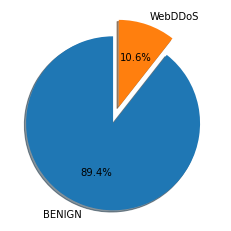

In [11]:
label = 'BENIGN', 'WebDDoS'
value = data[' Label'].value_counts()
fig1, ax1 = plt.subplots()
explodeTuple = (0.1, 0.1)
ax1.pie(value, explode = explodeTuple, labels = label, autopct='%1.1f%%',
        shadow=True, startangle=90)

将数字型特征拿出，取名num_fea (number features) 以01判断型特征拿出取名 binary_fea

In [12]:
num_fea = data[[
           " Flow Duration",
           " Total Fwd Packets",
           " Total Backward Packets",
           "Total Length of Fwd Packets",
           " Total Length of Bwd Packets",
           " Down/Up Ratio",
           " Fwd Packet Length Max",
           " Fwd Packet Length Min",
           " Fwd Packet Length Mean",
           " Fwd Packet Length Std",
           "Bwd Packet Length Max",
           " Bwd Packet Length Min",
           " Bwd Packet Length Mean",
           " Bwd Packet Length Std",
           "Flow Bytes/s",
           " Flow Packets/s",
           " Flow IAT Mean",
           " Flow IAT Std",
           " Flow IAT Max",
           " Flow IAT Min", 
           "Fwd IAT Total",
           " Fwd IAT Mean",
           " Fwd IAT Std",
           " Fwd IAT Max", 
           " Fwd IAT Min",
           "Bwd IAT Total", 
           " Bwd IAT Mean",
           " Bwd IAT Std", 
           " Bwd IAT Max", 
           " Bwd IAT Min", 
           " Fwd Header Length",
           " Bwd Header Length",
           "Fwd Packets/s",
           " Bwd Packets/s", 
           " Min Packet Length",
           " Max Packet Length",
           " Packet Length Mean",
           " Packet Length Std",
           " Packet Length Variance",
           " Avg Bwd Segment Size",
           " Average Packet Size",
           " Avg Fwd Segment Size",
           " Fwd Header Length",
           "Subflow Fwd Packets", 
           " Subflow Fwd Bytes", 
           " Subflow Bwd Packets",
           " Subflow Bwd Bytes",
           "Init_Win_bytes_forward", 
           " Init_Win_bytes_backward", 
           " act_data_pkt_fwd",
           " min_seg_size_forward",
           "Active Mean",
           " Active Std",
           " Active Max",
           " Active Min",
           "Idle Mean",
           " Idle Std",
           " Idle Max",
           " Idle Min"

 ]]
binary_fea = data[["Fwd PSH Flags",
           " Bwd PSH Flags",  # 0
           " Fwd URG Flags",  # 0
           " Bwd URG Flags",  # 0
           "FIN Flag Count", 
           " SYN Flag Count",
           " RST Flag Count",
           " PSH Flag Count",
           " ACK Flag Count",
           " URG Flag Count",
           " CWE Flag Count",  # 0
           " ECE Flag Count",
           "Fwd Avg Bytes/Bulk",  # 0
           " Fwd Avg Packets/Bulk", # 0
           " Fwd Avg Bulk Rate",  # 0
           " Bwd Avg Bytes/Bulk",  # 0
           " Bwd Avg Packets/Bulk", # 0
           "Bwd Avg Bulk Rate"]]


In [13]:
num_fea.dtypes

 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets     float64
 Total Length of Bwd Packets    float64
 Down/Up Ratio                  float64
 Fwd Packet Length Max          float64
 Fwd Packet Length Min          float64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max           float64
 Bwd Packet Length Min          float64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                    float64
 Flow Packets/s                 float64
 Flow IAT Mean                  float64
 Flow IAT Std                   float64
 Flow IAT Max                   float64
 Flow IAT Min                   float64
Fwd IAT Total                   float64
 Fwd IAT Mean                   float64
 Fwd IAT Std                    float64
 Fwd IAT Max                    float64
 Fwd IAT Min                    float64


In [14]:
num_fea = num_fea.astype('float64')

In [15]:
binary_fea.dtypes

Fwd PSH Flags            int64
 Bwd PSH Flags           int64
 Fwd URG Flags           int64
 Bwd URG Flags           int64
FIN Flag Count           int64
 SYN Flag Count          int64
 RST Flag Count          int64
 PSH Flag Count          int64
 ACK Flag Count          int64
 URG Flag Count          int64
 CWE Flag Count          int64
 ECE Flag Count          int64
Fwd Avg Bytes/Bulk       int64
 Fwd Avg Packets/Bulk    int64
 Fwd Avg Bulk Rate       int64
 Bwd Avg Bytes/Bulk      int64
 Bwd Avg Packets/Bulk    int64
Bwd Avg Bulk Rate        int64
dtype: object

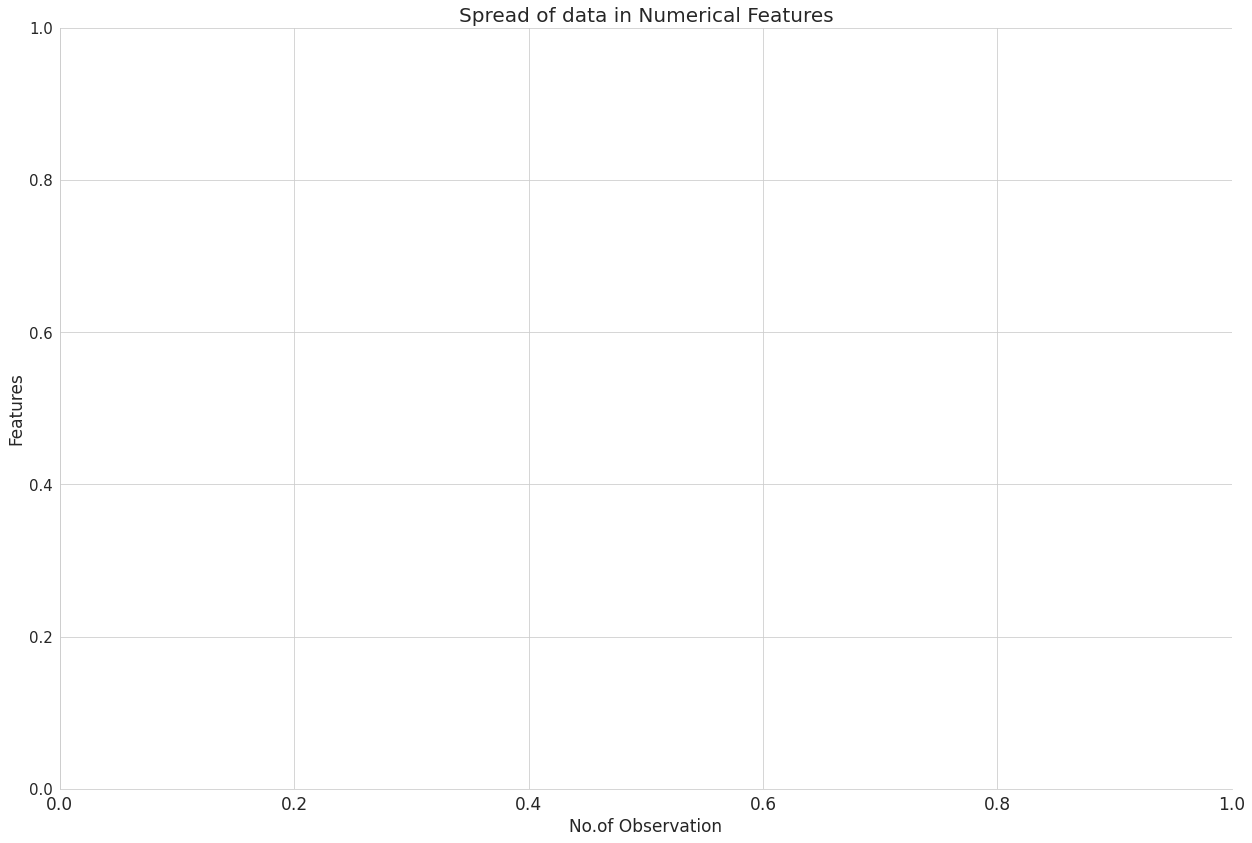

In [16]:
num_fea.dropna(how='any')

sns.set_style("whitegrid")

#Size of the plot
plt.subplots(figsize=(21, 14))

# setting color of the plot
color = sns.color_palette('pastel')

# Using seaborn to plot it horizontally with 'color'
# sns.boxplot(data = num_fea.dropna(how='any'), orient='h', palette=color)

# Uncomment below code to visualize where every single data observation of the features lie in the plot 
#sns.swarmplot(data = num_fea)  #WARNING THIS WILL TAKE LOTS OF TIME DEPENDING ON CPU POWER AND RAM YOU HAVE  !!

# Title of the graph
plt.title('Spread of data in Numerical Features', size = 20)

# Horizontal axis Label
plt.xlabel('No.of Observation', size = 17)
# Vertical axis Label
plt.ylabel('Features', size = 17)

# x-axis label size
plt.xticks(size = 17)
#y-axis label size
plt.yticks(size = 15)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

将图像画出，能看出有些数据类型如flow 数据流量， Flow IAT Mean相连流量包相差平均时间 Flow IAT Min相差最小时间 Active Max 流量快被遗弃时最大时间，Idle Std 流量被遗弃然后又激活重传标准时间 ，这些特征并不像其他特征紧密链接，而是出现跳跃，特异值聚集在一起，因为含有大量dos类型数据，所以从特征可以明显看出可疑流量。

In [17]:
df = pd.DataFrame(data)
df = df.drop(df.std()[df.std() < .3].index.values, axis=1)
df = df.drop(df.std()[df.std() > 1000].index.values, axis=1)

这里抽出一部分数据来训练，防止训练准确率太低且弄混原数据，且去掉最大最小。

In [18]:
df.shape

(4144, 32)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.vis_utils import model_to_dot
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


开始训练模型

In [20]:
df.replace(to_replace ="BENIGN", value = 1, inplace = True)
df.replace(to_replace ="WebDDoS", value = 0, inplace = True)
df.head(3)

,Total Fwd Packets,Total Backward Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,...,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Bwd Packets,act_data_pkt_fwd,Inbound,Label
10165,5,0,300.0,300.0,300.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0,0.0,360.000000,300.000000,0.000000,5,0,4,0,1
18111,52,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0,0.0,0.000000,0.000000,0.000000,52,0,0,0,1
21193,9,6,590.0,0.0,131.111111,260.165546,1073.0,0.0,357.666667,554.094817,...,0,0.0,221.733333,131.111111,357.666667,9,6,2,1,0


In [21]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(how="any", inplace = True)

x = df.drop(' Label', 1)
y = df[' Label']

df = df[~df['Flow Bytes/s'].isin(['Infinity'])]
df = df[~df[' Flow Packets/s'].isin(['Infinity'])]
df = df.iloc[:100000]

In [22]:
x.describe()

,Total Fwd Packets,Total Backward Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,...,URG Flag Count,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Bwd Packets,act_data_pkt_fwd,Inbound
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,...,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,6.527771,6.311666,153.698035,17.158137,43.371808,46.001765,324.623333,36.481446,107.725022,92.327707,...,0.396556,0.257822,1.068154,86.873987,43.371808,107.725022,6.527771,6.311666,2.711375,0.221441
std,15.581434,17.804770,378.665787,43.090133,85.496373,121.992909,790.426990,56.322836,231.653553,254.855793,...,0.489242,0.437489,1.021820,162.581295,85.496373,231.653553,15.581434,17.804770,6.895676,0.415267
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,2.000000,2.000000,32.000000,0.000000,31.000000,0.000000,48.000000,0.000000,47.000000,0.000000,...,0.000000,0.000000,1.000000,51.750000,31.000000,47.000000,2.000000,2.000000,1.000000,0.000000
75%,3.000000,2.000000,46.000000,36.000000,43.000000,2.309401,106.000000,68.000000,102.000000,0.000000,...,1.000000,1.000000,1.000000,83.750000,43.000000,102.000000,3.000000,2.000000,1.000000,0.000000
max,350.000000,421.000000,3087.000000,1715.000000,2595.555556,1168.847509,3500.000000,327.000000,1946.666667,1469.591780,...,1.000000,1.000000,12.000000,2409.000000,2595.555556,1946.666667,350.000000,421.000000,94.000000,1.000000


In [23]:
#Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train.max()
X_test.max()

910000000.0

In [24]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)
print('Train images shape:', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Test images shape:', X_test.shape)
print('Test labels shape:', y_test.shape)
print('Train labels:', y_train)
print('Test labels:', y_test)

Train images shape: (3298, 31)
Train labels shape: (3298,)
Test images shape: (825, 31)
Test labels shape: (825,)
Train labels: [1 1 1 ... 1 1 1]
Test labels: [1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1

训练模型 普通cnn全链接层 SGD优化模型

In [25]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim = 31))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
from keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss = "binary_crossentropy", optimizer = opt, metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
history = model.fit(X_train, y_train, epochs=20,
          verbose=1, batch_size=100)


Epoch 1/20
3298/3298 [==============================] - 0s 94us/step - loss: 0.6198 - accuracy: 0.8775
Epoch 2/20
3298/3298 [==============================] - 0s 39us/step - loss: 0.5359 - accuracy: 0.8996
Epoch 3/20
3298/3298 [==============================] - 0s 35us/step - loss: 0.4734 - accuracy: 0.8996
Epoch 4/20
3298/3298 [==============================] - 0s 32us/step - loss: 0.4269 - accuracy: 0.8996
Epoch 5/20
3298/3298 [==============================] - 0s 32us/step - loss: 0.3969 - accuracy: 0.8996
Epoch 6/20
3298/3298 [==============================] - 0s 34us/step - loss: 0.3743 - accuracy: 0.8996
Epoch 7/20
3298/3298 [==============================] - 0s 38us/step - loss: 0.3580 - accuracy: 0.8996
Epoch 8/20
3298/3298 [==============================] - 0s 36us/step - loss: 0.3495 - accuracy: 0.8996
Epoch 9/20
3298/3298 [==============================] - 0s 34us/step - loss: 0.3392 - accuracy: 0.8996
Epoch 10/20
3298/3298 [==============================] - 0s 35us/step - 

准确率很高，大概因为只选择关键特征，且本身数据dos数据，且量很多

In [27]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

825/825 [==============================] - 0s 59us/step
Test loss: 0.3283289023240407
Test accuracy: 0.8690909147262573


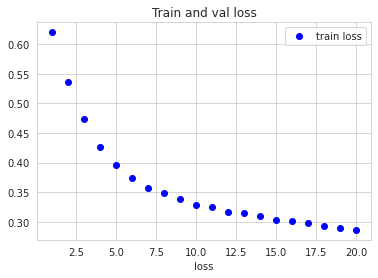

In [28]:
history_dict = history.history
history_dict.keys()
acc = history_dict['accuracy']
loss = history_dict['loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='train loss')
plt.title('Train and val loss')
plt.xlabel('Epochs')
plt.xlabel('loss')
plt.legend()
plt.show()

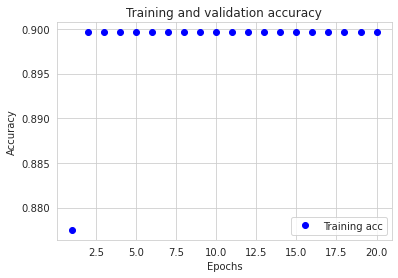

In [29]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

画出了损失和准确率图，接下来拿出流量数据进行预测，看是否有dos

In [30]:
testdata= pd.read_csv(filedir+files[1])
testdata.head(3)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,186059,172.16.0.5-192.168.50.1-58445-4463-17,172.16.0.5,58445,192.168.50.1,4463,17,2018-12-01 13:04:45.928673,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
1,135692,172.16.0.5-192.168.50.1-36908-9914-17,172.16.0.5,36908,192.168.50.1,9914,17,2018-12-01 13:04:45.928913,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
2,33822,172.16.0.5-192.168.50.1-41727-32361-17,172.16.0.5,41727,192.168.50.1,32361,17,2018-12-01 13:04:45.928915,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag


导入流量数据，标签是no label 先预处理预测只需要22个特征，看能不能预测

In [31]:
predictions = model.predict(X_test)
print(predictions[1012])
print(X_test[1012])


IndexError: index 1012 is out of bounds for axis 0 with size 825

预测第1012个测试数据可能是dos数据，可信度0.99 该测试数据值是这些，根据值反向查找可以查到原来地址

In [ ]:
testdata.head(3)


In [ ]:
df.head(3)

In [ ]:
from minisom import MiniSom

In [ ]:
df.head(3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train = np.array(X_train)

In [ ]:
print(X_train [1012])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
sc = MinMaxScaler()

In [ ]:
Y=df[' Label']
X= df.drop(' Label', 1)
X.shape
#Y.shape

In [ ]:
X_sc = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_sc, columns=X.columns)

In [ ]:
X_scaled.head()
df = df.iloc[:10000]

In [ ]:
from minisom import MiniSom

In [ ]:
map_dim = 16
som = MiniSom(map_dim, map_dim, 28, sigma=1.0, random_seed=1)
som.train_batch(X_sc, num_iteration=len(X_sc)*2, verbose=True)

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(som.distance_map(), annot=True, fmt='.3f')
ax.set_yticks(range(16))
ax.set_xticks(range(16))

In [ ]:
data=np.genfromtxt("D:\web安全\Cryptography-ML-project/10.01-10.10.pcap_Flow.csv",delimiter=',', usecols=(1,) , dtype=str)

In [ ]:
plt.figure(figsize=(14, 14))
author_to_color = {0: 'chocolate',
                   1: 'steelblue'}
color = [author_to_color[yy] for yy in y]
for i, (t, c, vec) in enumerate(zip(data, color, X_sc)):
    winnin_position = som.winner(vec)
    plt.text(winnin_position[0], 
             winnin_position[1]+np.random.rand()*.9, 
             t,
             color=c)

plt.xticks(range(map_dim))
plt.yticks(range(map_dim))
plt.grid()
plt.xlim([0, map_dim])
plt.ylim([0, map_dim])
plt.plot()


In [ ]:
import matplotlib.image as mpimg
Tfb1 = mpimg.imread('D:\web安全\img\TF2.0/tfb18.jpg')
plt.figure(figsize=(120,120))
plt.title('waf')
plt.imshow(Tfb1)
plt.show()

上表是waf告警的ip中查到的ip，下图是SOM聚类算法的ip，明显看到的几个ip有112.64.119.152与115.200.239.145这两个ip是被聚类到一起，攻击方式都有web端的代码执行。其他如109.228.74.16和202.107.201.3都有攻击嫌疑

In [ ]:
Tfb2 = mpimg.imread('D:\web安全\img\TF2.0/tfb19.jpg')
plt.figure(figsize=(120,120))
plt.imshow(Tfb2)
plt.show()